In [6]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [22]:


# 이미지 데이터 경로 지정
data_dir = 'dataset_fog'


print(data_dir)
# 이미지 데이터 전처리
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # 픽셀 값을 0-1 범위로 조정하고, 검증 데이터로 20% 사용

train_data = datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=20, class_mode='binary', subset='training')
valid_data = datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=20, class_mode='binary', subset='validation')

# CNN 모델 생성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




dataset_fog
Found 503 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('best_model_epoch1000.h5', monitor='val_loss', save_best_only=True)

history = model.fit(train_data, validation_data=valid_data, epochs=1000, callbacks=[model_checkpoint])

Epoch 1/1000
26/26 [==============================] - 17s 624ms/step - loss: 0.7951 - accuracy: 0.8569 - val_loss: 1.4658 - val_accuracy: 0.3814
Epoch 2/1000
26/26 [==============================] - 12s 468ms/step - loss: 0.0839 - accuracy: 0.9742 - val_loss: 3.1487 - val_accuracy: 0.4140
Epoch 3/1000
26/26 [==============================] - 11s 431ms/step - loss: 0.0108 - accuracy: 0.9980 - val_loss: 2.2817 - val_accuracy: 0.5256
Epoch 4/1000
26/26 [==============================] - 11s 428ms/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 4.3706 - val_accuracy: 0.4093
Epoch 5/1000
26/26 [==============================] - 11s 432ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 5.8853 - val_accuracy: 0.3767
Epoch 6/1000
26/26 [==============================] - 11s 430ms/step - loss: 5.8870e-04 - accuracy: 1.0000 - val_loss: 5.8503 - val_accuracy: 0.3860
Epoch 7/1000
26/26 [==============================] - 11s 432ms/step - loss: 4.0298e-04 - accuracy: 1.0000 - val_loss: 5.8323 

AttributeError: 'ModelCheckpoint' object has no attribute 'history'

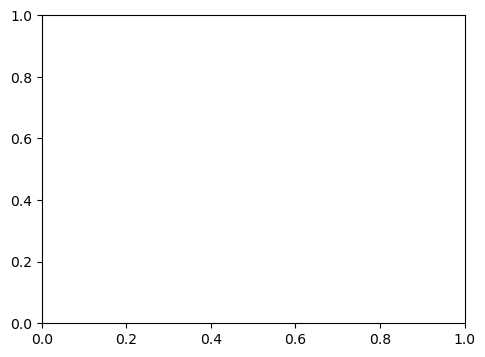

In [24]:
# 손실률 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
model.save('fog_classifier_epoch1000.h5')  # h5 확장자로 모델 저장

In [12]:
# 모델 불러오기
from tensorflow.keras.models import load_model

model = load_model('best_model_epoch1000.h5')  # 저장한 모델 불러오기


In [9]:
# 모델 불러오기
from tensorflow.keras.models import load_model

model = load_model('fog_classifier_epoch1000.h5')  # 저장한 모델 불러오기

In [13]:

# 예측하고자 하는 이미지 파일 경로
img_path = 'fog_test.png'

# 이미지 로딩 및 전처리
img = image.load_img(img_path, target_size=(150, 150)) # 이미지 로딩 및 크기 조정
img_array = image.img_to_array(img) # 이미지를 numpy 배열로 변환
img_array = np.expand_dims(img_array, axis=0) # 이미지에 batch 차원 추가
img_array /= 255. # 모델 훈련 때와 동일하게 픽셀 값을 0-1 범위로 스케일링

# 이미지에 대한 예측 수행
prediction = model.predict(img_array)

print(prediction)
# 예측 결과 출력
if prediction > 0.9:
    print("이미지에 안개가 있습니다.")
else:
    print("이미지에 안개가 없습니다.")


1/1 [==============================] - 0s 48ms/step
[[0.99505293]]
이미지에 안개가 있습니다.


In [14]:

# 예측하고자 하는 이미지 파일 경로
img_path = 'No_fog_test.jpg'

# 이미지 로딩 및 전처리
img = image.load_img(img_path, target_size=(150, 150)) # 이미지 로딩 및 크기 조정
img_array = image.img_to_array(img) # 이미지를 numpy 배열로 변환
img_array = np.expand_dims(img_array, axis=0) # 이미지에 batch 차원 추가
img_array /= 255. # 모델 훈련 때와 동일하게 픽셀 값을 0-1 범위로 스케일링

# 이미지에 대한 예측 수행
prediction = model.predict(img_array)

print(prediction)
# 예측 결과 출력
if prediction > 0.9:
    print("이미지에 안개가 있습니다.")
else:
    print("이미지에 안개가 없습니다.")


1/1 [==============================] - 0s 20ms/step
[[0.8744941]]
이미지에 안개가 없습니다.
